<a href="https://colab.research.google.com/github/sandhiya-git-hub/AI-Tasks/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Drop irrelevant columns (Customer ID doesn't help prediction)
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

In [6]:
if df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# Drop rows with NaN values (usually very few)
df.dropna(inplace=True)


In [8]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn']) # Yes=1, No=0


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f"\nOriginal Training Shape: {X_train.shape}")
print(f"Class distribution before SMOTE: \n{y_train.value_counts()}")

# Apply SMOTE to balance the training data
# This creates synthetic samples of the minority class (Churners)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Original Training Shape: (5625, 30)
Class distribution before SMOTE: 
Churn
0    4130
1    1495
Name: count, dtype: int64


In [12]:
# 4. TRAINING THE MODEL
# Limiting max_depth to prevent overfitting (creating a tree that is too complex)
clf = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
# 5. VALIDATION & EVALUATION

y_pred = clf.predict(X_test)

print("\n--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



--- Model Evaluation ---
Accuracy Score: 0.73

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1033
           1       0.49      0.73      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407



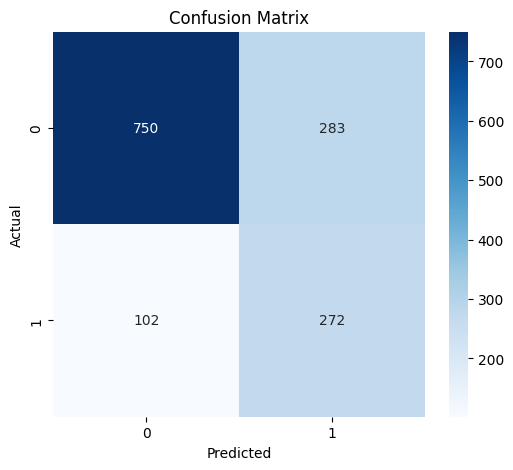

In [14]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

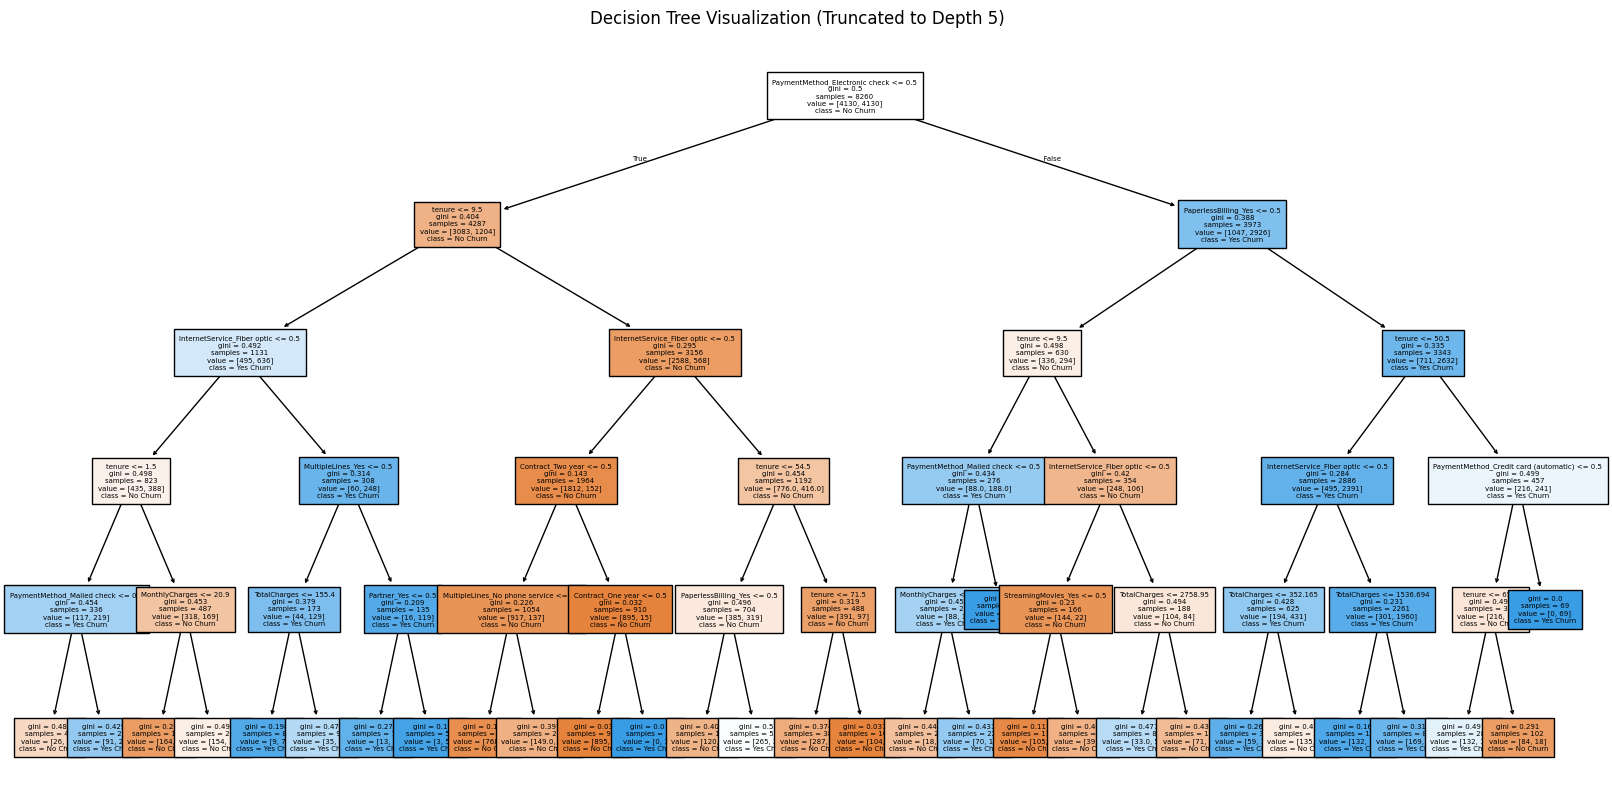

In [15]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Churn', 'Yes Churn'], filled=True, fontsize=5)
plt.title("Decision Tree Visualization (Truncated to Depth 5)")
plt.show()